<a href="https://colab.research.google.com/github/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly import *
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict # Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.metrics import classification_report, roc_auc_score, precision_score,recall_score
from yellowbrick.classifier import ROCAUC



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [4]:
# The URL is from Fatmir's Project 2 Github, 
# Pratik suggested to get the url so it can load fast, it only took a few seconds to load now! - Celine
path20 = 'https://raw.githubusercontent.com/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/master/Jan_2020_ontime.csv'
path19 = 'https://raw.githubusercontent.com/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/master/Jan_2019_ontime.csv'
df19 = pd.read_csv(path19)
df20 = pd.read_csv(path20)
df20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [5]:
df20.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [6]:
df19 = df19.drop('Unnamed: 21', axis = 1)
df20 = df20.drop('Unnamed: 21', axis = 1)

In [7]:
print(df19.shape)
print(df19.describe())
print(df19.dtypes)

(583985, 21)
        DAY_OF_MONTH    DAY_OF_WEEK  ...       DIVERTED       DISTANCE
count  583985.000000  583985.000000  ...  583985.000000  583985.000000
mean       15.960088       3.835626  ...       0.002219     797.742767
std         8.987942       1.921899  ...       0.047056     589.999261
min         1.000000       1.000000  ...       0.000000      31.000000
25%         8.000000       2.000000  ...       0.000000     363.000000
50%        16.000000       4.000000  ...       0.000000     640.000000
75%        24.000000       5.000000  ...       0.000000    1037.000000
max        31.000000       7.000000  ...       1.000000    4983.000000

[8 rows x 15 columns]
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    ob

In [8]:
print(df20.shape)
print(df20.describe())
print(df20.dtypes)

(607346, 21)
        DAY_OF_MONTH    DAY_OF_WEEK  ...       DIVERTED       DISTANCE
count  607346.000000  607346.000000  ...  607346.000000  607346.000000
mean       16.014354       3.955735  ...       0.001893     798.022341
std         8.990719       1.910205  ...       0.043473     587.282639
min         1.000000       1.000000  ...       0.000000      31.000000
25%         8.000000       2.000000  ...       0.000000     369.000000
50%        16.000000       4.000000  ...       0.000000     641.000000
75%        24.000000       5.000000  ...       0.000000    1037.000000
max        31.000000       7.000000  ...       1.000000    5095.000000

[8 rows x 15 columns]
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    ob

In [9]:
# Number of NaN values in df for each column
df19.isna().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [10]:
df20.isna().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
OP_CARRIER_AIRLINE_ID       0
OP_CARRIER                  0
TAIL_NUM                  698
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 6664
DEP_DEL15                6699
DEP_TIME_BLK                0
ARR_TIME                 7075
ARR_DEL15                8078
CANCELLED                   0
DIVERTED                    0
DISTANCE                    0
dtype: int64

In [11]:
# dropped NaN values in df
df19 = df19.dropna()
print(df19.shape)

(565963, 21)


In [12]:
# dropped NaN values in df
df20 = df20.dropna()
print(df20.shape)

(599268, 21)


In [13]:
# verifying if NaN values were dropped
df19.isna().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [14]:
df20.isna().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [15]:
# Number of Unique elements in df
df19.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5441
OP_CARRIER_FL_NUM        6833
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1451
dtype: int64

In [16]:
# Number of Unique elements in df
df20.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5443
OP_CARRIER_FL_NUM        6719
ORIGIN_AIRPORT_ID         351
ORIGIN_AIRPORT_SEQ_ID     351
ORIGIN                    351
DEST_AIRPORT_ID           350
DEST_AIRPORT_SEQ_ID       350
DEST                      350
DEP_TIME                 1432
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1470
dtype: int64

In [17]:
df19['ORIGIN'].unique()

array(['GNV', 'MSP', 'DTW', 'TLH', 'ATL', 'DAY', 'JAN', 'LGA', 'JAX',
       'BMI', 'CAK', 'PHL', 'JFK', 'AGS', 'LIT', 'IND', 'EYW', 'CAE',
       'CWA', 'TRI', 'BOS', 'MGM', 'MDT', 'MKE', 'TVC', 'FSM', 'BHM',
       'PIA', 'CVG', 'GTR', 'SDF', 'BNA', 'SAT', 'LFT', 'MSN', 'DSM',
       'EVV', 'ABE', 'DCA', 'BWI', 'ILM', 'TYS', 'LEX', 'CLE', 'ELM',
       'EWN', 'PHF', 'SHV', 'CSG', 'TUL', 'BDL', 'DFW', 'RIC', 'RAP',
       'PIT', 'CRW', 'GPT', 'CHA', 'OMA', 'IAD', 'RDU', 'SAV', 'GRR',
       'BTV', 'LAN', 'OAJ', 'AEX', 'CHO', 'CHS', 'HRL', 'ORF', 'MOT',
       'HSV', 'MCO', 'BTR', 'LAX', 'ORD', 'PHX', 'MIA', 'CMH', 'SFO',
       'SEA', 'STL', 'CLT', 'LAS', 'OAK', 'BUF', 'FLL', 'SJU', 'ALB',
       'PWM', 'SMF', 'MHT', 'TPA', 'EGE', 'OGG', 'HNL', 'MSY', 'IAH',
       'KOA', 'DEN', 'SAN', 'TUS', 'SJC', 'SNA', 'GRI', 'SLC', 'FAT',
       'EWR', 'JAC', 'MCI', 'PNS', 'ELP', 'AUS', 'ABQ', 'PSP', 'MEM',
       'PBI', 'PDX', 'ACT', 'ABI', 'DRT', 'GSO', 'BIL', 'AVP', 'CLL',
       'CID', 'CRP',

In [18]:
df20['ORIGIN'].unique()

array(['ORD', 'TUL', 'EWR', 'BTR', 'RIC', 'OMA', 'IAH', 'DCA', 'CRP',
       'LGA', 'MAF', 'OKC', 'LFT', 'JAX', 'COS', 'SBN', 'SAV', 'TYS',
       'ELP', 'CVG', 'ORF', 'MCI', 'BRO', 'RDU', 'LEX', 'GRK', 'MLU',
       'AVL', 'PIT', 'CLT', 'GPT', 'CLE', 'JAN', 'EYW', 'BNA', 'LBB',
       'ERI', 'SGF', 'GSO', 'ROC', 'IND', 'LCH', 'BTV', 'BUF', 'DTW',
       'GSP', 'FSD', 'MOB', 'HRL', 'MEM', 'STL', 'CMH', 'CAK', 'CHS',
       'SHV', 'MFE', 'ICT', 'MSP', 'HDN', 'HSV', 'GRB', 'GRR', 'VPS',
       'SAT', 'PNS', 'CRW', 'PWM', 'LIT', 'CLL', 'MSY', 'AMA', 'ABQ',
       'LRD', 'MTJ', 'AEX', 'ALB', 'ATL', 'AUS', 'BDL', 'BHM', 'BOI',
       'BOS', 'BUR', 'BWI', 'DAL', 'DEN', 'DSM', 'ECP', 'FLL', 'GEG',
       'HNL', 'HOU', 'IAD', 'ISP', 'KOA', 'LAS', 'LAX', 'LGB', 'LIH',
       'MCO', 'MDW', 'MHT', 'MKE', 'OAK', 'OGG', 'ONT', 'AZO', 'DFW',
       'MIA', 'AVP', 'ABI', 'CMI', 'MLI', 'CHO', 'TRI', 'GCK', 'SDF',
       'TVC', 'MSN', 'MQT', 'ROA', 'ALO', 'TXK', 'LSE', 'XNA', 'MHK',
       'CID', 'ATW',

In [19]:
df19['YEAR'] = 2019
df20['YEAR'] = 2020

In [20]:
df19.columns == df20.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [21]:
df = pd.concat([df19, df20])

In [22]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'YEAR'],
      dtype='object')

In [23]:
df['OP_UNIQUE_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [24]:
df['OP_CARRIER_AIRLINE_ID'].unique()

array([20363, 19805, 20398, 20368, 20397, 20409, 20378, 20366, 20436,
       20452, 19690, 20416, 20304, 19393, 19930, 19977, 19790])

In [25]:
df['OP_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [26]:
df['DIVERTED'].unique()

array([0.])

In [27]:
#Remove columns which won't be used
df_red = df.drop([ 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME',
       'CANCELLED','ARR_TIME',
       'DIVERTED'], axis = 1)

In [28]:
df_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE,YEAR
0,1,2,9E,GNV,ATL,0.0,0600-0659,0.0,300.0,2019
1,1,2,9E,MSP,CVG,0.0,1400-1459,0.0,596.0,2019
2,1,2,9E,DTW,CVG,0.0,1200-1259,0.0,229.0,2019
3,1,2,9E,TLH,ATL,0.0,1500-1559,0.0,223.0,2019
4,1,2,9E,ATL,FSM,0.0,1900-1959,0.0,579.0,2019


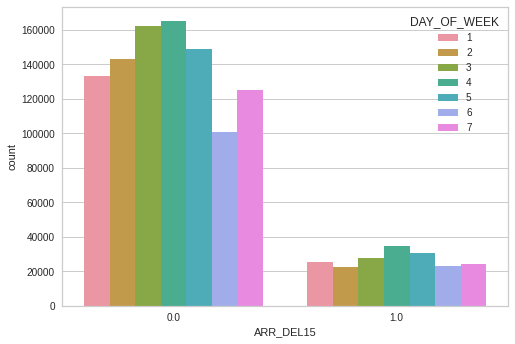

In [29]:
#all delayed flights by weekday
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DAY_OF_WEEK'])

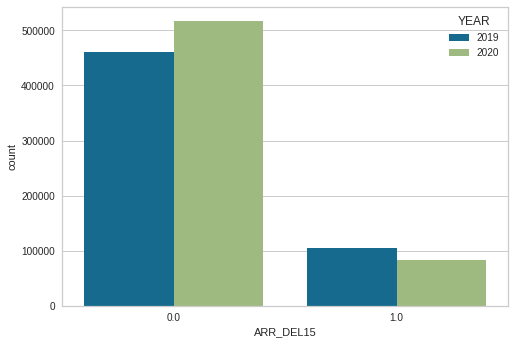

In [30]:
#all delayed flights by year
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['YEAR'])

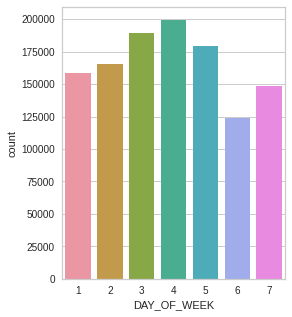

In [31]:
#all flights per day
f, ax = plt.subplots()
sb.countplot(x = df_red['DAY_OF_WEEK'])
f.set_size_inches(4,5)

Seems like we need to normalize the delayed flights per day to the total number of flights per day

<Figure size 576x432 with 0 Axes>

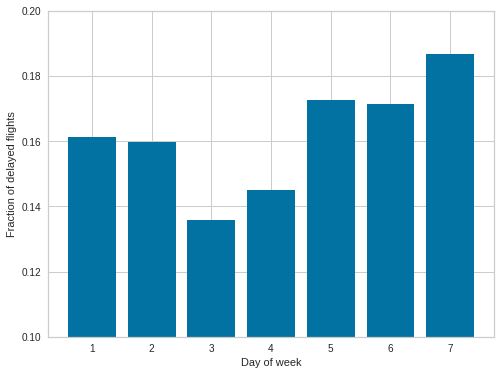

<Figure size 576x432 with 0 Axes>

In [32]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6))
plt.bar(x = df_red['DAY_OF_WEEK'].unique(), height = df_red.groupby(['DAY_OF_WEEK']).mean()['ARR_DEL15'])
plt.ylim([0.1, 0.2])
plt.xlabel('Day of week')
plt.ylabel('Fraction of delayed flights')
figure(num=None, figsize=(8, 6))

Text(0, 0.5, 'Fraction of delayed flights')

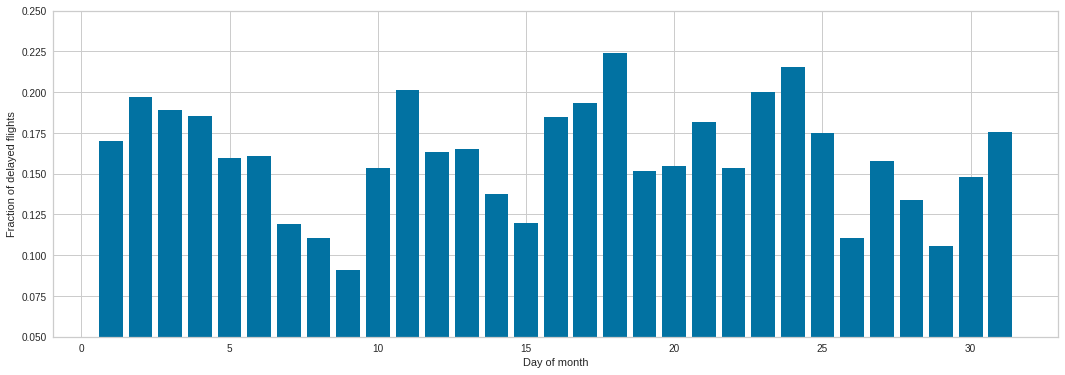

In [33]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['DAY_OF_MONTH'].unique(), height = df_red.groupby(['DAY_OF_MONTH']).mean()['ARR_DEL15'])
plt.ylim([0.05, 0.25])
plt.xlabel('Day of month')
plt.ylabel('Fraction of delayed flights')

Text(0, 0.5, 'Fraction of delayed flights')

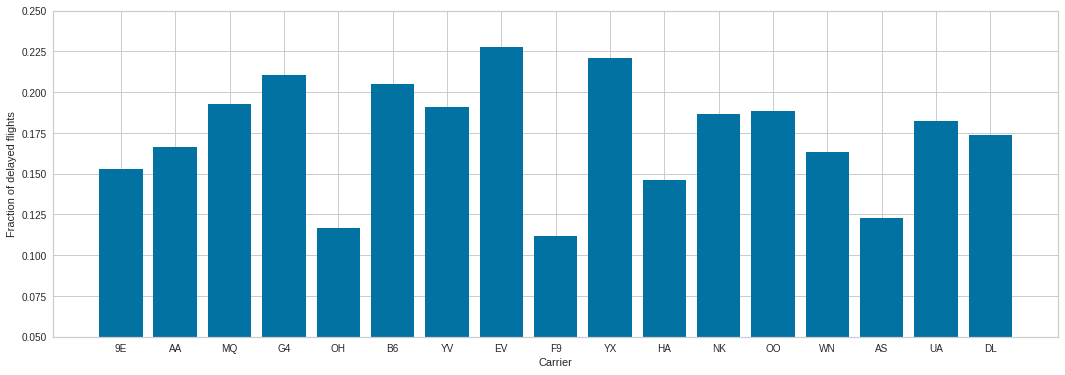

In [34]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['OP_UNIQUE_CARRIER'].unique(), height = df_red.groupby(['OP_UNIQUE_CARRIER']).mean()['ARR_DEL15'])
plt.ylim([0.05, 0.25])
plt.xlabel('Carrier')
plt.ylabel('Fraction of delayed flights')

Text(0, 0.5, 'Fraction of delayed flights')

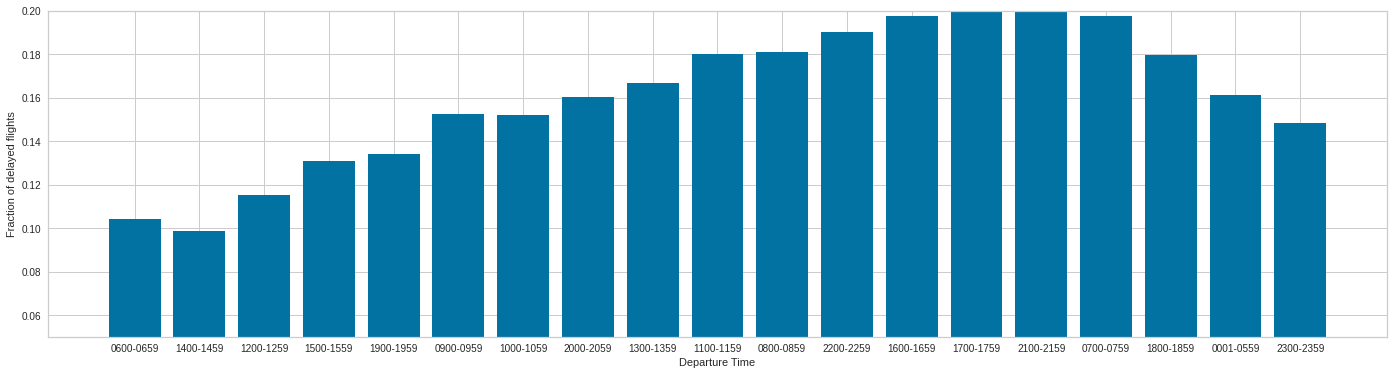

In [35]:
figure(num=None, figsize=(24, 6))
plt.bar(x = df_red['DEP_TIME_BLK'].unique(), height = df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'])
plt.ylim([0.05, 0.2])
plt.xlabel('Departure Time')
plt.ylabel('Fraction of delayed flights')

In [36]:
df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'].sort_values()

DEP_TIME_BLK
0600-0659    0.098793
0001-0559    0.104384
0700-0759    0.115250
0800-0859    0.130838
0900-0959    0.134258
2300-2359    0.148177
1100-1159    0.152182
1000-1059    0.152312
1200-1259    0.160066
2200-2259    0.160995
1300-1359    0.166544
2100-2159    0.179697
1400-1459    0.180077
1500-1559    0.180803
1600-1659    0.190362
1700-1759    0.197569
2000-2059    0.197690
1900-1959    0.199627
1800-1859    0.206462
Name: ARR_DEL15, dtype: float64

In [37]:
#Lowest and Highest ratio of delayed flights by Destination
df_red.groupby(['DEST']).mean()['ARR_DEL15'].sort_values()

DEST
LWS    0.047244
TWF    0.050847
BTM    0.051724
CPR    0.052326
ATY    0.053571
         ...   
OGS    0.338983
RIW    0.340000
ASE    0.343266
OGD    0.352941
MKG    0.353535
Name: ARR_DEL15, Length: 353, dtype: float64

In [38]:
#Lowest and Highest ratio of delfayed flights by Origin
df_red.groupby(['ORIGIN']).mean()['ARR_DEL15'].sort_values()

ORIGIN
CPR    0.028902
LWS    0.031250
BTM    0.051724
PIR    0.053571
ITO    0.060217
         ...   
ASE    0.359069
HGR    0.363636
PSM    0.372549
OGD    0.411765
SHR    0.486486
Name: ARR_DEL15, Length: 353, dtype: float64

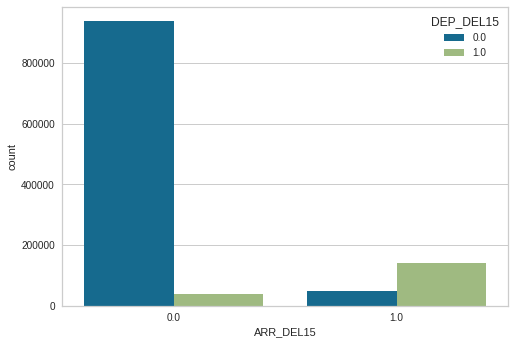

In [39]:
#Check by delay in departure
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DEP_DEL15'])

As expected flights that leave late also arrive late

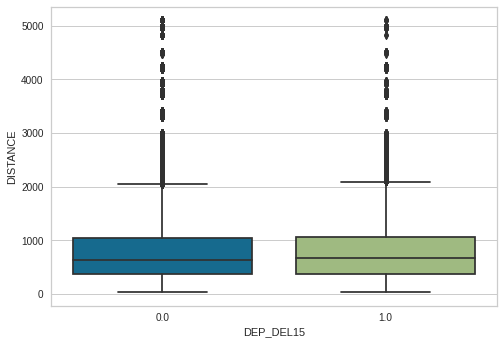

In [40]:
sb.boxplot('DEP_DEL15', 'DISTANCE', data=df_red, orient='v')

In [41]:
df_red.groupby(['DEP_DEL15']).mean()['DISTANCE']

DEP_DEL15
0.0    797.872948
1.0    818.171497
Name: DISTANCE, dtype: float64

In [42]:
df_red.groupby(['DEP_DEL15']).median()['DISTANCE']

DEP_DEL15
0.0    637.0
1.0    672.0
Name: DISTANCE, dtype: float64

There seems to be a slightly higher distance traveled for flights that were delayed. Let us do a t-test to check whether this difference is statistically significant

In [43]:
stats.ttest_ind(df_red[df_red['ARR_DEL15'] == 1]['DISTANCE'], df_red[df_red['ARR_DEL15'] == 0]['DISTANCE'], equal_var=False)

Ttest_indResult(statistic=7.442124854921654, pvalue=9.937754132365237e-14)

It is significant!

In [44]:
df_red = df_red.drop(['YEAR'], axis = 1)
df_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
0,1,2,9E,GNV,ATL,0.0,0600-0659,0.0,300.0
1,1,2,9E,MSP,CVG,0.0,1400-1459,0.0,596.0
2,1,2,9E,DTW,CVG,0.0,1200-1259,0.0,229.0
3,1,2,9E,TLH,ATL,0.0,1500-1559,0.0,223.0
4,1,2,9E,ATL,FSM,0.0,1900-1959,0.0,579.0


In [44]:
values = [df_red['DEP_DEL15'].value_counts()[0], df_red['DEP_DEL15'].value_counts()[1]]
labels = ["Not Delayed", "Delayed by (>15 minutes)"]
colors = ['bisque','red']
values_arr = [df_red['ARR_DEL15'].value_counts()[0],df_red['ARR_DEL15'].value_counts()[1]]
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Total Departures', 'Total Arrivals'])
fig.add_trace(go.Pie(labels=labels, values=values, pull=[0, 0.1],textinfo = 'label+percent'),1,1)
fig.add_trace(go.Pie(labels=labels, values=values_arr, pull=[0, 0.1],textinfo = 'label+percent'),1,2)
fig.update_traces( textinfo='value', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#fig.update_layout(uniformtext.minsize=4, uniformtext.mode='hide', title_text='Flights Delayed', title_x = 0.5, legend_title='Flights',legend=dict(x=.45, y=0.6))
fig.update_layout(dict1 = dict(title_text='Flights Delayed', title_x = 0.5, legend=dict(x=.45, y=0.6)))
fig.show()

In [45]:
dep_time = pd.DataFrame(df_red['DEP_TIME_BLK'].value_counts().reset_index().values, columns=["DEP_TIME_BLK", "AggregateDepTime"])
dep_time = dep_time.sort_values('DEP_TIME_BLK',ascending=True)
width = [0.5] *20
fig = go.Figure(data=[go.Bar(x = dep_time['DEP_TIME_BLK'], y = dep_time['AggregateDepTime'], width = width, 
                             marker_color =px.colors.sequential.turbid, opacity =0.8, marker_line_width=2, text = dep_time['AggregateDepTime'],textposition='outside' )])

fig.add_annotation( x='0600-0659', y=40000, text="<b>Highest Departures<b>",showarrow=False, font=dict( family="Calbiri", size=12, color = "#ffffff"), 
                   align="left", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363", ax=50, ay=-40, bordercolor="#302f2f", borderwidth=2.5, borderpad=6, bgcolor="#f29624", opacity=0.8)
fig.show()

In [46]:
Cancelled_flights = df_red.groupby('DAY_OF_MONTH')['CANCELLED'].count()
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=Cancelled_flights.index, y=Cancelled_flights.values, name='Cancel bar',opacity=0.9,marker_color='peachpuff'))

fig1.add_trace(go.Scatter(x=Cancelled_flights.index, y=Cancelled_flights.values, line=dict(color='firebrick'), name='Cancellation trend'))
fig1.update_layout(
    title="Checking the seasonality in cancellations",
    xaxis_title="Day of month",
    yaxis_title="Cancellations count",
)
fig1.show()


KeyError: ignored

In [ ]:
Diverted_flights = flights.groupby('DAY_OF_MONTH')['DIVERTED'].count()
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=Diverted_flights.index, y=Diverted_flights.values, name='Rerouting bar graph',opacity=0.9,marker_color='peachpuff'))

fig2.add_trace(go.Scatter(x=Diverted_flights.index, y=Diverted_flights.values, line=dict(color='firebrick'), name='Rerouting trend'))
fig2.update_layout(
    title="Checking the seasonality in rerouting",
    xaxis_title="Day of month",
    yaxis_title="Reroutings count",
)
fig2.show()

Inferences 


*   From the above two graphs it can be seen that 1,4,11,18,25 have least cancelled and rerouted flights. They have 7 days of gap in between. 
*   Similarly, dates 2,3,10,17,24 have most cancelled flights and rerouted flights. They also have 7 days of gap in them. 



---



In [ ]:
import calendar
yy = 2020 
mm = 1    
print(calendar.month(yy, mm))

    January 2020
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30 31



Inferences

From the above calendar for 2020 we can confirm that there is seasonality in the cancellations and rerouting flights.
*   Saturday's in the month have least cancelled and rerouted flights.
*   Friday's and Thursday in the month have highest no. of cancellations and rerouted flights. 

---





In [ ]:
#Checking if plots are same for cancellations and rerouting. 
all(Cancelled_flights== Diverted_flights)

True

##Droppping a Diverted Column
From the above we can see that `Cancelled` and `Diverted` columns are returing same values. Therefore, we can drop one column since the other doesn't provide different observations. IF we do not drop the column then it will have multicollinerity issues. Moreover, the column will not be a good feautre to run the algorithm. 



In [ ]:
flights.drop(['DIVERTED'], inplace= True, axis =1)

In [ ]:
plot6 = df_19.groupby('OP_CARRIER')['DEP_DEL15'].sum().sort_values()
fig6 = px.pie(names=plot6.index,values=list(map(int,plot6.values)),
              color_discrete_sequence =px.colors.qualitative.T10, hole=0.5, title='Airlines with most delayed flights')
fig6.show()


In [ ]:
# delayed flights show 1 on the df, which means True
delayed_flights = flights[flights['DEP_DEL15'] == 1]
f, ax = plt.subplots()
# counts how many times flight was delayed on each day of the week
sns.countplot(x= delayed_flights['DAY_OF_WEEK'], color= 'b')
f.set_size_inches(8,10)

In [ ]:
# counts how many times flights were delayed in each day of a month
f, ax = plt.subplots()
sns.countplot(x= delayed_flights['DAY_OF_MONTH'], color= 'b')
f.set_size_inches(10, 5)

In [ ]:
# counts how many times carrier airlines had delayed flights
f, ax = plt.subplots()
sns.countplot(x= delayed_flights['OP_CARRIER_AIRLINE_ID'], color= 'b')
f.set_size_inches(10, 5)

In [ ]:
# counts how many times flights were delayed in a certain interval of time
f, ax = plt.subplots()
sns.countplot(x= delayed_flights['DEP_TIME_BLK'], color= 'b')
# sets x axis labels and rotates it to make it easier to read
# I set rotation = 70 to help align it a bit more since 45 kinda confused me a bit) - Celine
ax.set_xticklabels(labels= delayed_flights['DEP_TIME_BLK'], rotation= 70)
f.set_size_inches(10, 5)

#**From Abstract***
We will be implementing random forest classifier, decision tree. As far as decision tree are concerned gradient boosting algorithms will be used as an ensemble method. If we find any weak classifiers in the dataset, we would try to combine those weak classifiers into one and using Ada Boost classifier. Lastly, neural network by using keras will be used to learn about delays. So, random forest classifier, decision tree, gradient boosting, Ada Boost classifier, neural network by keras. 

#Problem:
The problem we will tackle is predicting the number of flight delays using one year of past flight data

#so it's       
               Day of the Week v.s delayed flight 
              Day of the Month v.s delayed flight 
         OP Carrier Airline ID v.s delayed flight
                 Dep Time Bulk v.s delayed flight



Adding dummy variables for categorical variables: OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK'

In [45]:
df_dum = pd.get_dummies(df_red, columns = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK'])

In [46]:
df_dum.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,ARR_DEL15,DISTANCE,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,...,DEST_TOL,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM,DEP_TIME_BLK_0001-0559,DEP_TIME_BLK_0600-0659,DEP_TIME_BLK_0700-0759,DEP_TIME_BLK_0800-0859,DEP_TIME_BLK_0900-0959,DEP_TIME_BLK_1000-1059,DEP_TIME_BLK_1100-1159,DEP_TIME_BLK_1200-1259,DEP_TIME_BLK_1300-1359,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,1,2,0.0,0.0,300.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0.0,0.0,596.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0.0,229.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,2,0.0,0.0,223.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2,0.0,0.0,579.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


A very large number of dimensions...

Modeling

#**Logistic Regression**

In [47]:
X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

In [52]:
lr_model = LogisticRegression(max_iter=1000, tol = 0.001,  verbose=1)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

In [53]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [54]:
result = cross_val_score(lr_model,X_train,y_train, cv = cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


In [55]:
print(f'Lower Limit: {np.min(result)}')
print(f'Mean: {np.mean(result)}')
print(f'Upper Limit: {np.max(result)}')

Lower Limit: 0.9239514945547231
Mean: 0.9245917115075994
Upper Limit: 0.9251152133055277


In [56]:
pred = lr_model.predict(X_test)
pred_prob = lr_model.predict_proba(X_test)

In [57]:
print("Classification:\n", 
       classification_report(y_test, pred, digits=3))

# print the area under the curve
print(f'AUC: {roc_auc_score(y_test,pred_prob[:,1])}')

Classification:
               precision    recall  f1-score   support

         0.0      0.952     0.959     0.955    489067
         1.0      0.777     0.746     0.761     93549

    accuracy                          0.925    582616
   macro avg      0.864     0.852     0.858    582616
weighted avg      0.924     0.925     0.924    582616

AUC: 0.884714809367819


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.2min finished


0.924758331388084

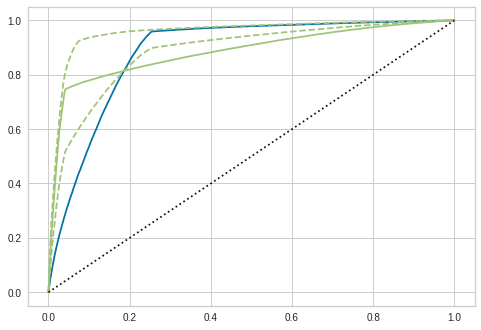

In [58]:
#ROC Curve
visualizer = ROCAUC(lr_model, classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 

*For some reason the legend doesn't show...*

#**Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 0)
dt_model = clf_dt.fit(X_train, y_train)

In [53]:
from sklearn import metrics
y_pred = dt_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    488604
         1.0       0.64      0.64      0.64     94012

    accuracy                           0.88    582616
   macro avg       0.79      0.79      0.79    582616
weighted avg       0.88      0.88      0.88    582616



0.883918395649965

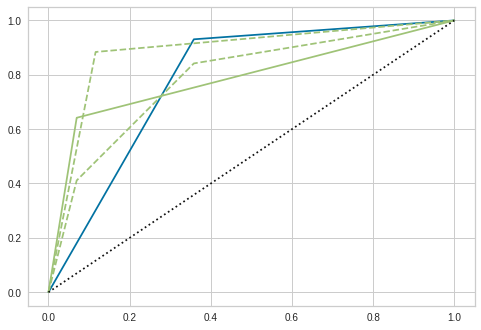

In [54]:
#ROC Curve
visualizer = ROCAUC(dt_model, classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 

#**Random Forest Classifier**

In [1]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9) # 10% training and 90% test because the model is very slow and doesn't run. It crashes--out of RAM memory

NameError: ignored

In [ ]:
#Create a Gaussian Classifier 
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))